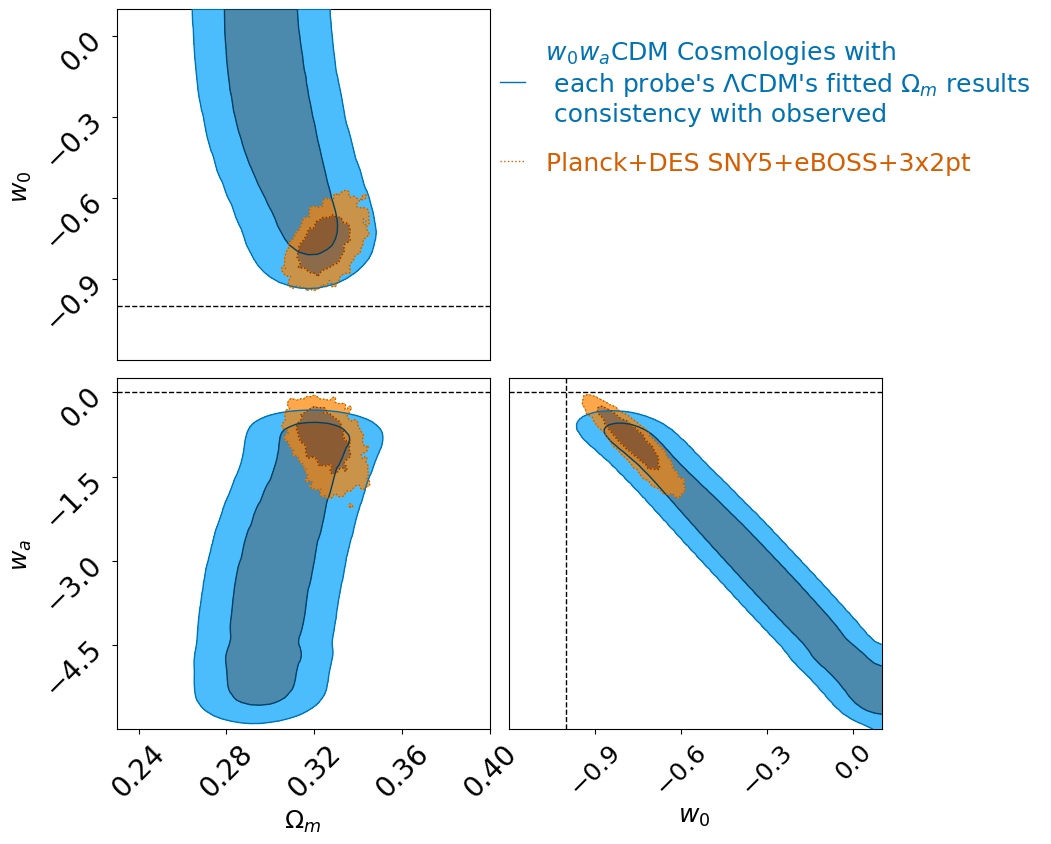

In [1]:
import pandas as pd
import numpy as np
from chainconsumer import Chain, ChainConfig, ChainConsumer, PlotConfig, Truth, make_sample
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

file_path_2 = 'data/fw0wacdm_planck+SN+eBOSS+3x2pt.txt'
data_sn_bao_cmb = pd.read_csv(file_path_2, sep='\s+', comment='#', header=None)
column_names_bao_cmb = [
    'omega_m', 'h0', 'omega_b', 'n_s', 'a_s', 'w', 'wa', 'mnu', 'tau',
    'shear_calibration_m1', 'shear_calibration_m2', 'shear_calibration_m3', 'shear_calibration_m4',
    'wl_photoz_bias_1', 'wl_photoz_bias_2', 'wl_photoz_bias_3', 'wl_photoz_bias_4',
    'lens_photoz_bias_1', 'lens_photoz_bias_2', 'lens_photoz_bias_3', 'lens_photoz_bias_4',
    'lens_photoz_width_1', 'lens_photoz_width_2', 'lens_photoz_width_3', 'lens_photoz_width_4',
    'bias_lens_b1', 'bias_lens_b2', 'bias_lens_b3', 'bias_lens_b4',
    'intrinsic_alignment_a1', 'intrinsic_alignment_a2', 'intrinsic_alignment_alpha1', 'intrinsic_alignment_alpha2',
    'intrinsic_alignment_bias_ta', 'prior', 'like', 'post', 'weight'
]
data_sn_bao_cmb.columns = column_names_bao_cmb
threshold = 1e-2000
data_sn_bao_cmb_cleaned = data_sn_bao_cmb[data_sn_bao_cmb['weight'] > threshold]

df = pd.read_csv('data/w0wa_for_lcdm_omm_cmb_sne_bao_with_covmat.csv')

true_value_sne = 0.353
true_value_bao = 0.295
true_value_cmb = 0.315
uncertainty_sne = 0.017
uncertainty_bao = 0.015
uncertainty_cmb = 0.007

df['prob_sne'] = np.exp(-0.5 * ((df['result_sne'] - true_value_sne) / uncertainty_sne) ** 2)
df['prob_bao'] = np.exp(-0.5 * ((df['result_bao'] - true_value_bao) / uncertainty_bao) ** 2)
df['prob_cmb'] = np.exp(-0.5 * ((df['result_cmb'] - true_value_cmb) / uncertainty_cmb) ** 2)
df['weight'] = df['prob_sne'] * df['prob_bao'] * df['prob_cmb']
df = df[df['weight'] > 0]

total_weight = df['weight'].sum()
if total_weight > 0:
    df['weight'] = df['weight'] / total_weight
    
    df = df[df['weight'] > 1e-2000]

else:
    raise ValueError("Total weight is zero after filtering. No samples to process.")


df = df.dropna(subset=['weight', 'w', 'wa', 'omega_m'])
df = df[np.isfinite(df['weight'])]

samples_df = df[['omega_m','w', 'wa', 'weight']].copy()

c = ChainConsumer()

c.add_chain(
    Chain(samples=samples_df, grid=True, name="$w_0w_a$CDM Cosmologies with \n   each probe's $\Lambda$CDM's fitted $\Omega_m$ results \n   consistency with observed", color="#0072B2"),
)
c.add_chain(
    Chain(samples=data_sn_bao_cmb_cleaned[['omega_m','w', 'wa', 'weight']], name="Planck+DES SNY5+eBOSS+3x2pt", color="#D55E00", linestyle=":"),
)
c.add_truth(Truth(location={"w": -1, "wa": 0}))

c.set_plot_config(
    PlotConfig(
        flip=False,
        grid=False,
        labels={"omega_m": r"$\Omega_m$","w": "$w_0$", "wa": "$w_a$"},
        label_font_size=18,
        plot_hists=False,
        show_legend=True,
        tick_font_size=20,

         legend_kwargs={
        "loc": (-0.05, 0.5),
        "fontsize": 18,
        "frameon": False,
        "shadow": False,
        "fancybox": True,
        "framealpha": 1,
        "borderaxespad": 10,
        "ncol": 1,
        "labelspacing": 1.0
    }
    )
)

fig = c.plotter.plot(figsize="column")
#plt.tight_layout()

ax_list = fig.get_axes()
#ax_list[2].set_ylim(0.26, 0.4)
#ax_list[3].set_ylim(0.26, 0.4)

for ax in ax_list:
    ax.grid(False)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

plt.tick_params( which='major', labelsize=18)

#legend_ax = inset_axes(ax_list[1], width="100%", height="100%", loc='upper right', borderpad=1)
#legend_ax.plot([], [], color="#D55E00", label="Planck+DES SNY5+eBOSS+3x2pt chain")
#legend_ax.plot([], [], 'white', label="\u00A0")
#legend_ax.text(0.8, -0.2, "", transform=legend_ax.transAxes)  # Position below the legend items

#legend_ax.plot([], [], color="#0072B2", label="$w_0w_a$CDM Cosmologies with \neach probe's $\Lambda$CDM's fitted $\Omega_m$ results \nconsistency with observed")
#legend_ax.legend(loc=(0.2,0.2), frameon=False, fontsize=13)
#legend_ax.axis('off')

fig.savefig('w0wa_grid_chainconsumer.png', dpi=600, bbox_inches='tight')
plt.show()



In [2]:
df

,w,wa,omega_m,result_sne,result_bao,result_cmb,prob_sne,prob_bao,prob_cmb,weight
0,-1.2,-3.074074,0.23,0.045850,0.274166,0.386691,1.301594e-71,3.811348e-01,1.672768e-23,1.628509e-97
1,-1.2,-3.907407,0.23,0.026897,0.294901,0.404984,1.249053e-80,9.999782e-01,1.308979e-36,3.208520e-119
2,-1.2,-3.166667,0.23,0.043548,0.276601,0.388858,1.117083e-72,4.713117e-01,6.694886e-25,6.917311e-100
3,-1.2,-3.259259,0.23,0.041298,0.279003,0.390989,9.953155e-74,5.662829e-01,2.575504e-26,2.848767e-102
4,-1.2,-2.796296,0.23,0.053078,0.266654,0.379962,2.579437e-68,1.677008e-01,1.988028e-19,1.687653e-90
...,...,...,...,...,...,...,...,...,...,...
161418,0.1,-1.947368,0.40,0.802881,0.392539,0.233280,8.459665e-153,6.579843e-10,2.540778e-30,2.775466e-194
161419,0.1,-1.855263,0.40,0.815027,0.395085,0.225751,4.026682e-161,2.151126e-10,5.020250e-36,8.533730e-209
161422,0.1,-1.763158,0.40,0.827373,0.398013,0.217937,8.287503e-170,5.736815e-11,1.774003e-42,1.655195e-224
161425,0.1,-1.118421,0.40,0.919531,0.435372,0.210246,6.936403e-242,9.625605e-20,2.348066e-49,3.076614e-312
